<a href="https://colab.research.google.com/github/shivanshu-reck/Machine-Learning-Projects/blob/main/basics_of_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basics of Machine Learning Colab-Notebook**

* **Author** : Shivanshu Shukla **||** **Date**   : 15/11/2023

* **Source** : [Google Cloud](https://www.cloudskillsboost.google/catalog)

* **Contact** : shivanshu.reck16@gmail.com

* **Linkedin** : [linkedin](www.linkedin.com/in/shivanshu-shukla-reck)

* **Github** : [github](https://github.com/shivanshu-reck)

* **Kaggle** : [Kaggle](https://www.kaggle.com/shivanshu1609)

## **Introduction**

**Consider the following problem** : *you're building a system that performs activity recognition for fitness tracking. You might have access to the speed at which a person is moving and attempt to infer their activity based on this speed using a conditional* :

In [2]:
if(speed<4){
  status=WALKING;
}

* *You could extend this to 'running' with another condition* :

In [ ]:
if(speed<4):
  status=WALKING
else:
  status=RUNNING


* *Similarly, you could detect **'cycling'** with another condition* :

In [ ]:
if(speed<4){
    status=WALKING
} else if(speed<12){
    status=RUNNING
} else {
    status=BIKING
}

Now consider what happens when you want to include an activity like golf?

Now, it becomes less obvious how to create a rule to determine the activity.

In [ ]:
## Now what?

It's extremely difficult to write a program (expressed in code) that helps you detect the golfing activity.

So what do you do? You can use machine learning to solve the problem!

## **What is machine learning?**

In the previous section you encountered a problem when you tried to determine a user's fitness activity. You hit limitations in what you could achieve by writing more code since your conditions have to be more complex to detect an activity like golf.

*Consider building applications in the traditional manner as represented in the following diagram* :

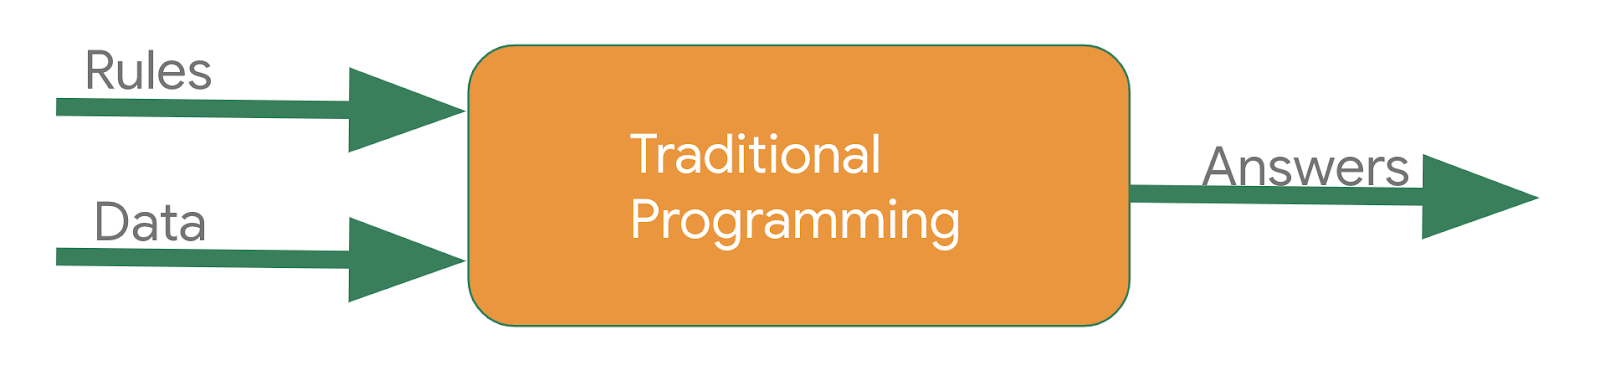

You express **rules** in a programming language. These act on **data** and your program provides answers. In the case of activity detection, the rules (the code you wrote to define types of activities) acted upon the data (the person's movement speed) in order to find an answer -- the return value from the function for determining the activity status of the user (whether they were walking, running, biking, etc.).

The process for detecting this activity via machine learning is very similar -- only the axes are different :

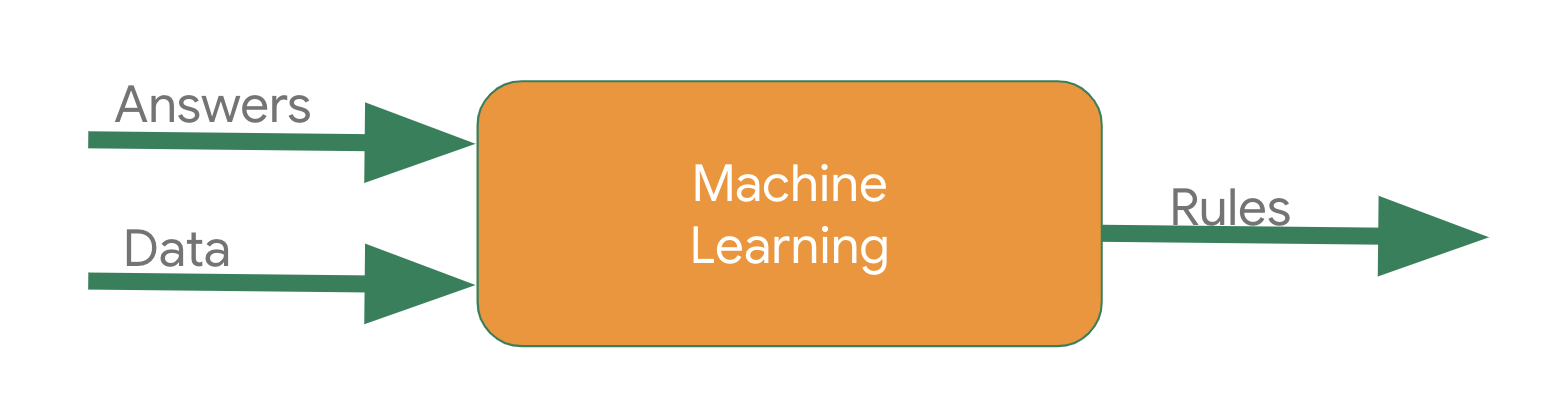

Instead of trying to define the rules and expressing them in a programming language, you provide the answers (typically called labels) along with the data. The machine then infers the rules that determine the relationship between the answers and the data. For example, in a machine learning context, your activity detection scenario might look like this :

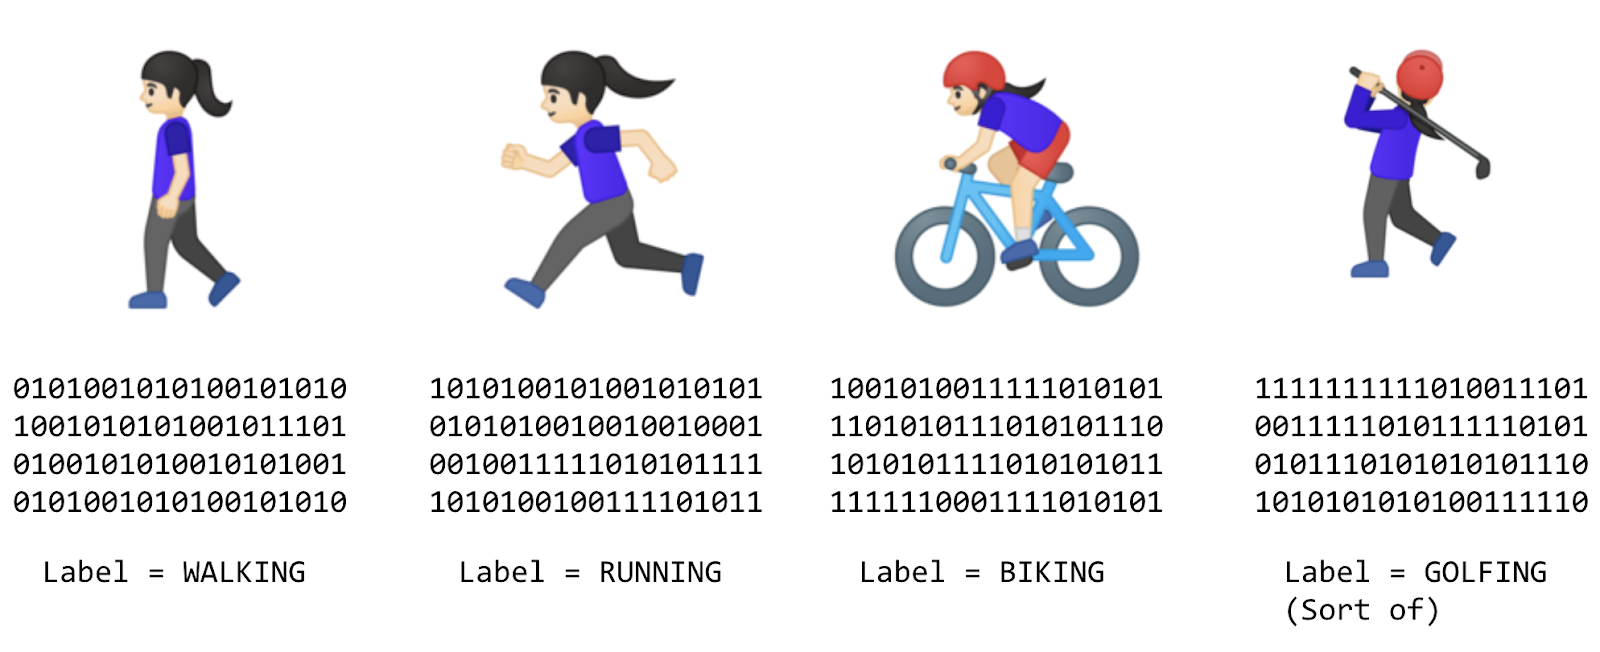

You gather lots of data, and label it to effectively say "This is what walking looks like", "This is what running looks like" etc. Then, from the data, the computer can infer the rules that determine what the distinct patterns that denote a particular activity are.

Beyond being an alternative method to programming this scenario, this also gives you the ability to open up new scenarios, such as golfing, which may not have been possible under the traditional rule-based programming approach.

In traditional programming your code compiles into a binary that is typically called a program. In machine learning, the item that you create from the data and labels is called a model.

So if you go back to this diagram :

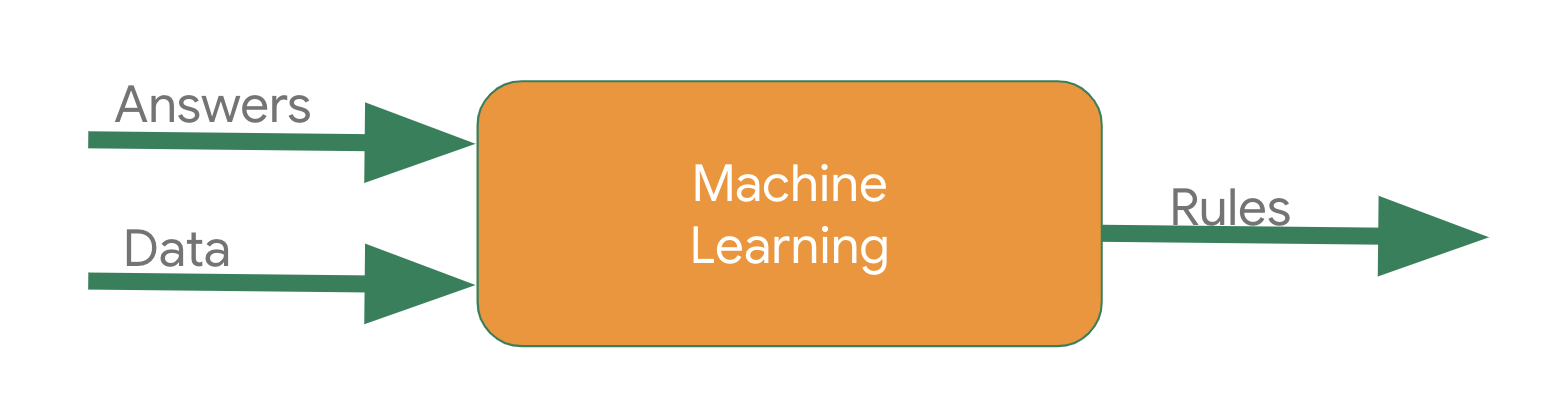

Consider the result of the above to be a model, which is used like this at runtime :

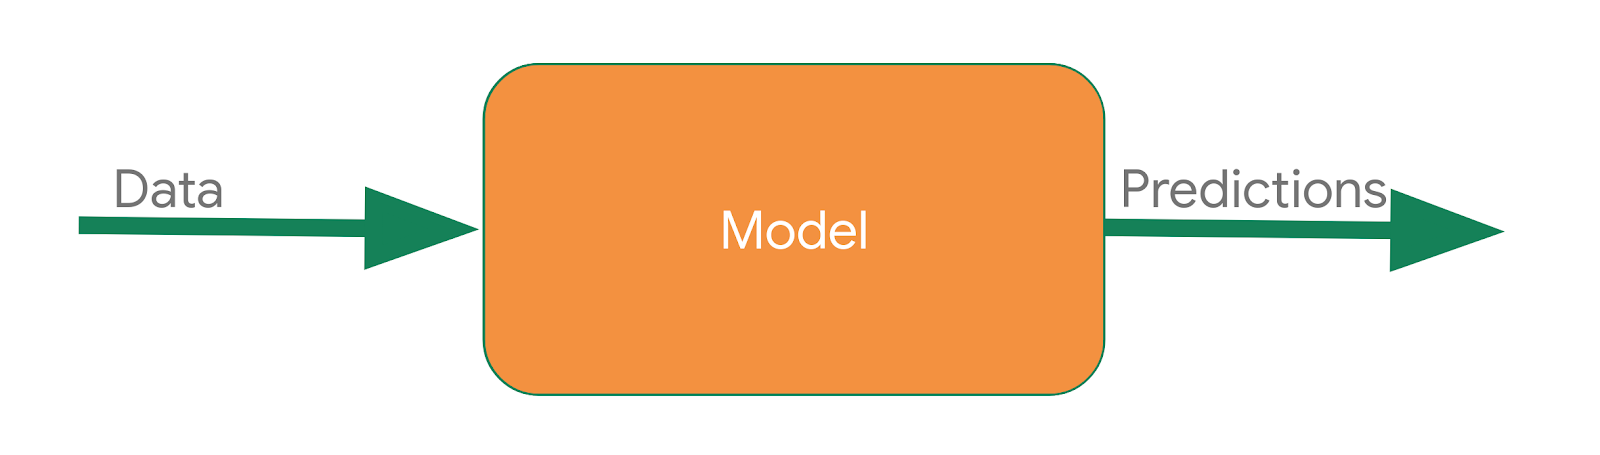

You pass the model some data, and the model uses the rules it inferred from the training to come up with a prediction -- i.e. "That data looks like walking", "That data looks like biking" etc.

**In this NoteBook you will build a very simple ‘Hello World' model made up of the building blocks that can be used in any machine learning scenario!**

## **Create your first machine learning model**

* Consider the following sets of numbers. Can you see the relationship between them?

                           X  :  -1  0  1  2  3   4
                           Y  :  -2  1  4  7  10  13

* As you read left to right, notice that the X value is increasing by 1 and the corresponding Y value is increasing by 3. So, the relationship should be **Y=3X** plus or minus some value.

* Then, take look at the 0 on X and see that the corresponding Y value is 1.

* From both of these observations, you can determine that the relationship is **Y=3X+1**.

This is almost exactly how you would use code to train a model, known as a **neural network**, to spot the patterns in the data!

**You use data to train the neural network! By feeding it with a set of Xs and a set of Ys, it should be able to figure out the relationship between them.**

## **Start coding!**

### **Import necessary packages :**

Import tensorflow for training and evaluating the model. Call it tf for ease of use.

In [4]:
# Import TensorFlow

import tensorflow as tf

Import numpy, to represent the data as lists. Call it np for ease of use.

In [5]:
# Import numpy

import numpy as np

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

###**Prepare the data :**

Next up, you will prepare the data your model will be trained on. In this lab, you're using the 6 Xs and 6 Ys used earlier :

                           X  :  -1  0  1  2  3   4
                           Y  :  -2  1  4  7  10  13

As you can see, the relationship between the Xs and Ys is Y=3x+1, so where **X = 1**, **Y = 4** and so on.

A python library called **numpy** provides lots of array type data structures that are a defacto standard way of feeding in data. To use these, specify the values as an **array** in numpy using **np.array([ ])**

In [6]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

###**Design the model :**

In this section, you will design your model using TensorFlow.

You will use a machine learning algorithm called **Neural Network** to train your model. You will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron. The neural network's input is only one value at a time. Hence, the input shape must be [1].

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

###**Compile the model :**

Next, you will write the code to compile your neural network. When you do, you must specify 2 functions, a loss and an optimizer.

If you've seen lots of math for machine learning, this is where you would usually use it, but tf.keras nicely encapsulates it in functions for you.

* From your previous examination, you know that the relationship between the numbers is **y=3x+1**.

* When the computer is trying to learn this relationship, it makes a guess...maybe **y=10x+10**. The loss function measures the guessed answers against the known correct answers and measures how well or how badly it did.

* Next, the model uses the optimizer function to make another guess. Based on the loss function's result, it will try to minimize the loss. At this point, maybe it will come up with something like **y=5x+5**. While this is still pretty bad, it's closer to the correct result (i.e. the loss is lower).

* The model repeats this for the number of epochs you specify.

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.MeanSquaredError())

In the above code snippet, you tell the model to use mean_squared_error for the loss and stochastic gradient descent (sgd) for the optimizer. You don't need to understand the math for these yet, but you will see that they work!

###**Train the neural network :**

To train the neural network to 'learn' the relationship between the Xs and Ys, you will use **model.fit**.

This function will train the model in a loop where it will make a guess, measure how good or bad it is (aka the loss), use the optimizer to make another guess, etc. It will repeat this process for the number of epochs you specify, which in this NoteBook is 500.

In [ ]:
model.fit(xs, ys, epochs=500)

In the above code model.fit will train the model for a fixed number of epochs.

**Now, your code should look like this :**

In [ ]:
# Import TensorFlow

import tensorflow as tf

# Import numpy

import numpy as np


xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.MeanSquaredError())

model.fit(xs, ys, epochs=500)

Now look at the output. Notice that the script prints out the loss for each epoch. Your output may be slightly different that what is illustrated here.

If you scroll through the epochs, you see that the loss value is quite large for the first few epochs, but gets smaller with each step. For example :

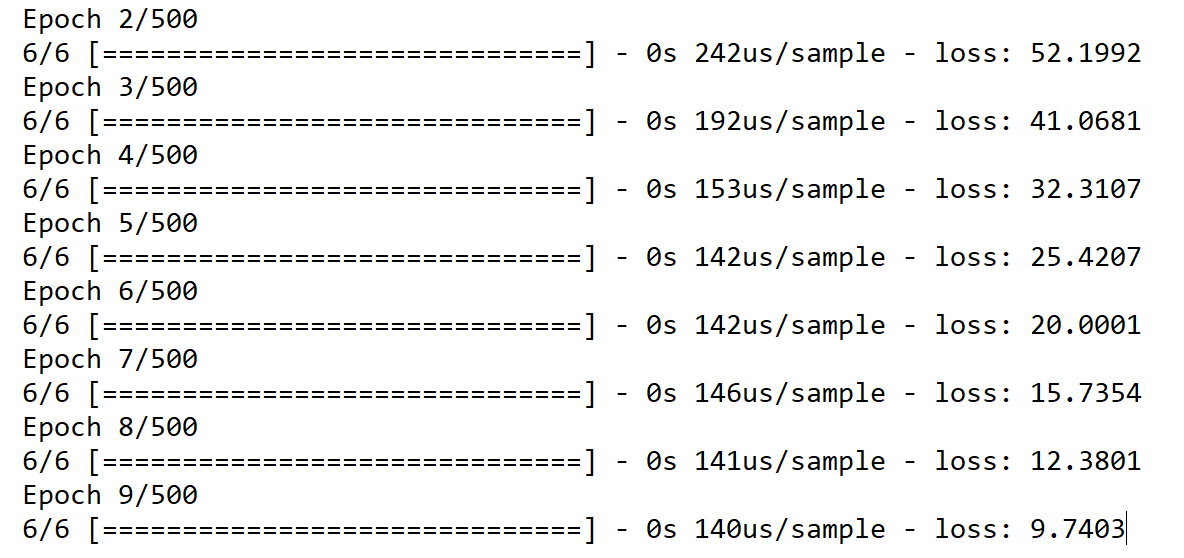

As the training progresses, the loss gets very small :

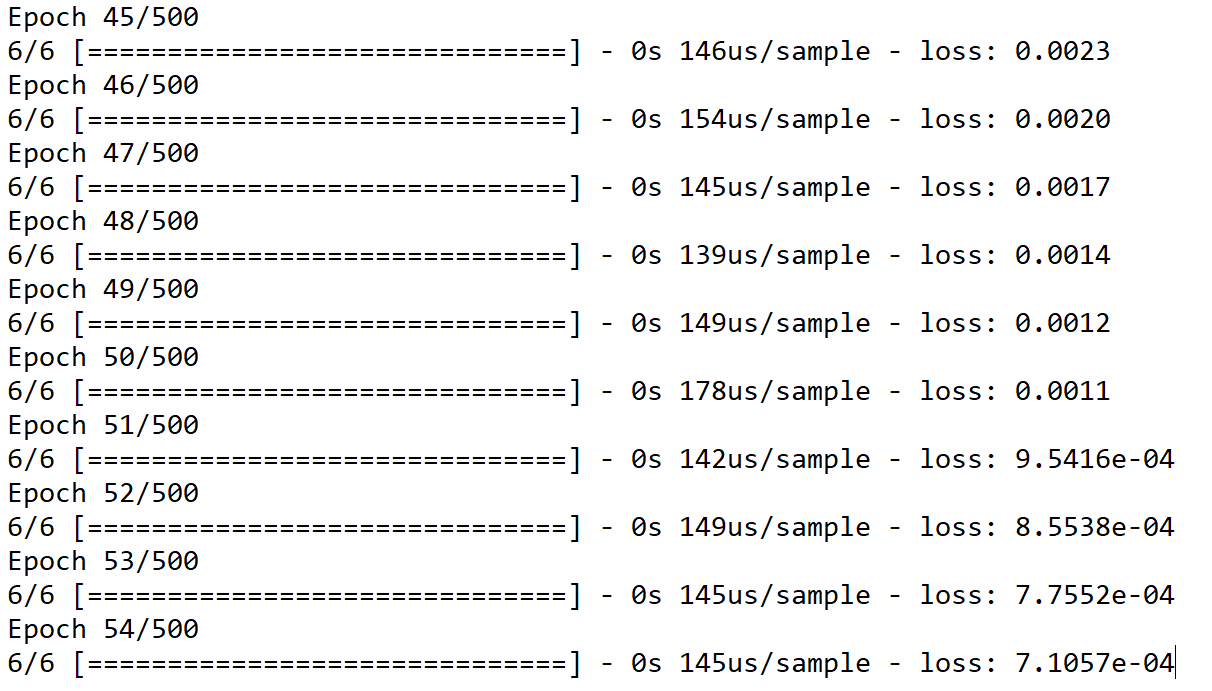

And by the time the training is done, the loss becomes extremely small, showing that our model is doing a great job of inferring the relationship between the numbers :

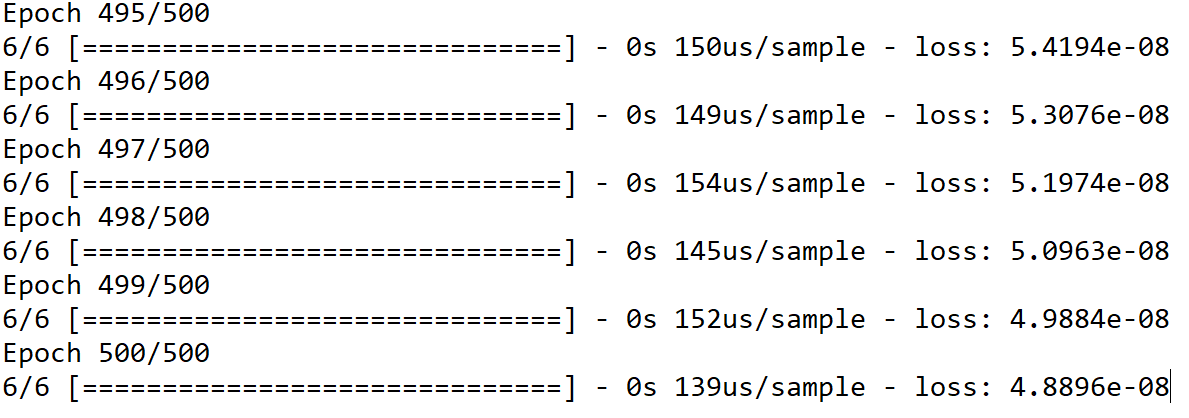

You probably don't need all 500 epochs, try experimenting with different values. Looking at this example, the loss is really small after only 50 epochs, so that might be enough!



###**Using the model :**

You now have a model that has been trained to learn the relationship between X and Y.

You can use the **model.predict** method to figure out the Y for an X not previously seen by the model during training. So, for example, if **X = 10**, what do you think Y will be?

In [14]:
model.predict(np.array([[10]]))

1/1 [==============================] - 0s 90ms/step


array([[30.997805]], dtype=float32)

You might have thought Y=31, right? But it ended up being a little over (30.997805). Why do you think that is?

**Answer** : Neural networks deal with probabilities. It calculated that there is a very high probability that the relationship between X and Y is Y=3X+1. But with only 6 data points it can't know for sure. As a result, the result for 10 is very close to 31, but not necessarily 31.

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.

##**Congratulations!**

**This concludes the self-paced NoteBook, TensorFlow : Qwik Start. You created, trained, and tested your own Machine Learning Model using TensorFlow.**